In [95]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from scipy.ndimage import median_filter
###########################
# Setup Plotting Defaults #
###########################
# For more options see https://matplotlib.org/users/customizing.html

# Commands for high detail plots (much larger in file size though)
#mpl.rcParams['agg.path.chunksize'] = 1000
#mpl.rcParams['savefig.dpi'] = 1000

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid', 'navy', 'brown'])


# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Helvetica'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['axes.labelpad'] = 10.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.8
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


# Figure size
#mpl.rcParams['figure.figsize'] = 10, 6

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

In [103]:
# MLim = np.loadtxt("../stored_limits/BlackHoleSpins_Baryakhtar.txt")
MLim = np.loadtxt("../stored_limits/Cyg_Barya.txt")
DLim = np.loadtxt("../stored_limits/BlackHoleSpins_Mehta.txt")
ULim = np.loadtxt("../stored_limits/BlackHoleSpins_Unal.txt")

MeGRS = np.loadtxt("../stored_limits/Me_GRS_Rel_N3.dat")
MeM33 = np.loadtxt("../stored_limits/Me_M33_Rel_N3.dat")
MeLMC = np.loadtxt("../stored_limits/Me_LMC_Rel_N3.dat")
MeCYG = np.loadtxt("../stored_limits/Me_CygX1_Rel_N3.dat")
# MeCYG2 = np.loadtxt("../stored_limits/Me_CygCons_X1_N3_Rel.dat")
MeCYG2 = np.loadtxt("../stored_limits/Me_CygX1_Con_Rel_N3.dat")

MeGRO = np.loadtxt("../stored_limits/Me_GRO_Rel_N3.dat")

# MeGRS = np.loadtxt("../stored_limits/Me_GRS.dat")

# MeCYGN4 = np.loadtxt("../stored_limits/Me_Cygx1_N4_2.dat")






In [104]:
from scipy.interpolate import interp1d

m33I = interp1d(np.log10(MeGRS[:,0]), np.log10(MeGRS[:,1]), fill_value=-20, bounds_error=False)
grsI = interp1d(np.log10(MeM33[:,0]), np.log10(MeM33[:,1]),  fill_value=-20, bounds_error=False)
lmcI = interp1d(np.log10(MeLMC[:,0]), np.log10(MeLMC[:,1]),  fill_value=-20, bounds_error=False)
cygI = interp1d(np.log10(MeCYG[:,0]), np.log10(MeCYG[:,1]),  fill_value=-20, bounds_error=False)

bbn = np.logspace(-13, -11, 100)
outtot = np.zeros_like(bbn)
for i in range(len(bbn)):
    val = np.max([10**m33I(np.log10(bbn[i])), 10**grsI(np.log10(bbn[i])), 10**lmcI(np.log10(bbn[i])), 10**cygI(np.log10(bbn[i]))])
    outtot[i] = val
    
    

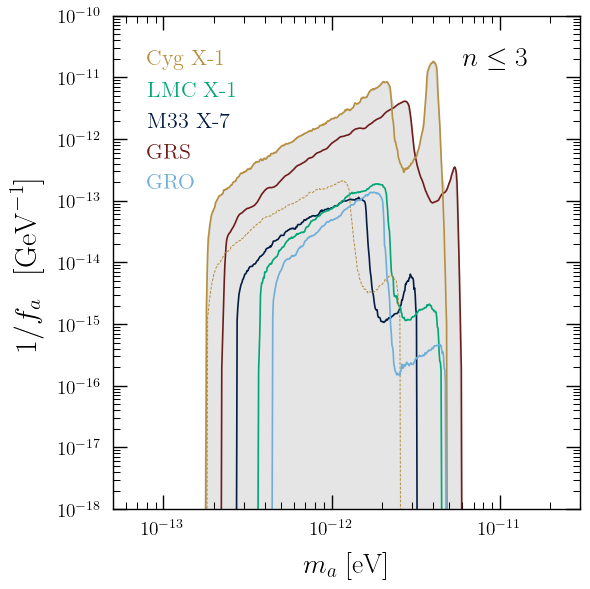

In [105]:
fig, ax = plt.subplots(1, figsize=(6,6))

lww=1.2
ax.plot(MeGRS[:,0], MeGRS[:,1], "#6F1D1B", lw=lww)
ax.plot(MeM33[:,0], MeM33[:,1], "#031D44", lw=lww)
ax.plot(MeLMC[:,0], MeLMC[:,1], "#00A676", lw=lww)
ax.plot(MeCYG[:,0], MeCYG[:,1], "#B68F40", lw=lww)
ax.plot(MeCYG2[:,0], MeCYG2[:,1], "#B68F40", lw=lww*.6, ls="--")
ax.plot(MeGRO[:,0], MeGRO[:,1], "#6DAEDB", lw=lww)

ax.fill_between(bbn, outtot, 0, color="k",ec="k", alpha=0.1)

ax.set_yscale("log")
ax.set_xscale("log")


#plt.plot(DLim[:,0], DLim[:,1])
ax.set_ylim([1e-18, 1e-10])
ax.set_xlim([5e-14, 3e-11])
ax.set_xlabel(r"$m_a$   [eV]", fontsize=20)
ax.set_ylabel(r"$1 / f_a$  \, [${\rm GeV}^{-1}$]", fontsize=22)
ax.text(8e-14, 10**-10.8, "Cyg X-1", fontsize=16, c="#B68F40");
ax.text(8e-14, 10**-11.3, "LMC X-1", fontsize=16, c="#00A676");
ax.text(8e-14, 10**-11.8, "M33 X-7", fontsize=16, c="#031D44");
ax.text(8e-14, 10**-12.3, "GRS", fontsize=16, c="#6F1D1B");
ax.text(8e-14, 10**-12.8, "GRO", fontsize=16, c="#6DAEDB");

ax.text(6e-12, 10**-10.8, r"$n \leq 3$", fontsize=20, c="k");
plt.tight_layout()
plt.savefig("TwoLvl.jpeg", dpi=200)

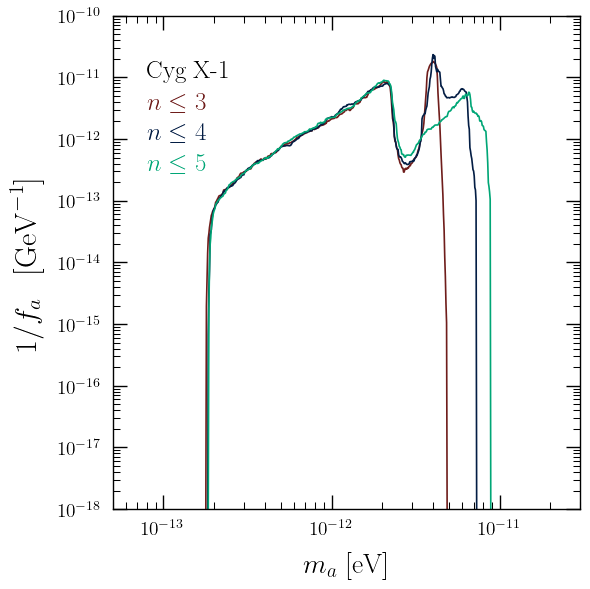

In [68]:
cygN3 = np.loadtxt("../stored_limits/Me_CygX1_Rel_N3.dat")
cygN4 = np.loadtxt("../stored_limits/Me_CygX1_Rel_N4.dat")
cygN5 = np.loadtxt("../stored_limits/Me_CygX1_Rel_N5.dat")

fig, ax = plt.subplots(1, figsize=(6,6))

cList = ["#6F1D1B", "#031D44", "#00A676", "#B68F40", "#B68F40", "#6DAEDB"]

lww=1.2
ax.plot(cygN3[:,0], cygN3[:,1], cList[0], lw=lww)
ax.plot(cygN4[:,0], cygN4[:,1], cList[1], lw=lww)
ax.plot(cygN5[:,0], cygN5[:,1], cList[2], lw=lww)

# ax.plot(cyg_doddy[:,0], cyg_doddy[:,1], cList[2], lw=lww*2, ls= (0, (9, 10)))
#ax.fill_between(bbn, outtot, 0, color="k",ec="k", alpha=0.1)

ax.set_yscale("log")
ax.set_xscale("log")


ax.set_ylim([1e-18, 1e-10])
ax.set_xlim([5e-14, 3e-11])
ax.set_xlabel(r"$m_a$   [eV]", fontsize=20)
ax.set_ylabel(r"$1 / f_a$  \, [${\rm GeV}^{-1}$]", fontsize=22)

ax.text(8e-14, 10**-11, "Cyg X-1", fontsize=18, c="k");

ax.text(8e-14, 10**-11.5, r"$n \leq 3$", fontsize=18, c=cList[0]);
ax.text(8e-14, 10**-12, r"$n \leq 4$", fontsize=18, c=cList[1]);
ax.text(8e-14, 10**-12.5, r"$n \leq 5$", fontsize=18, c=cList[2]);

# ax.text(6e-12, 10**-10.8, r"$n \leq 3$", fontsize=20, c="k");
plt.tight_layout()
plt.savefig("Cyg_n3n4n5.jpeg", dpi=200)

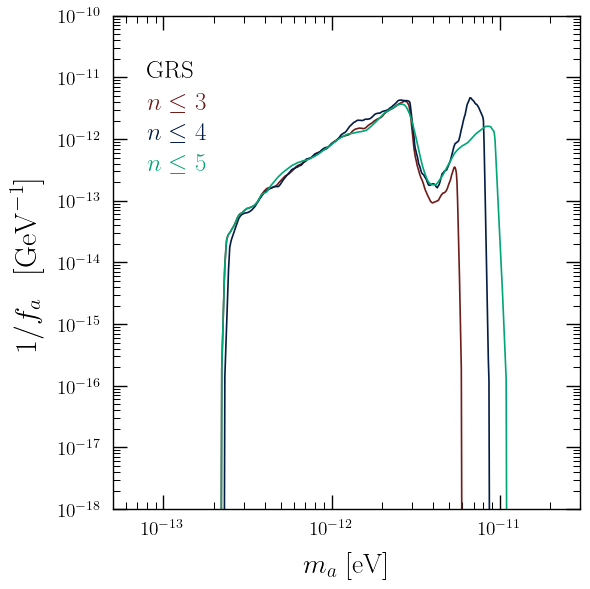

In [120]:
grsN3 = np.loadtxt("../stored_limits/Me_GRS_Rel_N3.dat")
grsN4 = np.loadtxt("../stored_limits/Me_GRS_Rel_N4.dat")
grsN5 = np.loadtxt("../stored_limits/Me_GRS_Rel_N5.dat")

fig, ax = plt.subplots(1, figsize=(6,6))

cList = ["#6F1D1B", "#031D44", "#00A676", "#B68F40", "#B68F40", "#6DAEDB"]

lww=1.2
ax.plot(grsN3[:,0], grsN3[:,1], cList[0], lw=lww)
ax.plot(grsN4[:,0], grsN4[:,1], cList[1], lw=lww)
ax.plot(grsN5[:,0], grsN5[:,1], cList[2], lw=lww)

# ax.plot(cyg_doddy[:,0], cyg_doddy[:,1], cList[2], lw=lww*2, ls= (0, (9, 10)))
#ax.fill_between(bbn, outtot, 0, color="k",ec="k", alpha=0.1)

ax.set_yscale("log")
ax.set_xscale("log")


ax.set_ylim([1e-18, 1e-10])
ax.set_xlim([5e-14, 3e-11])
ax.set_xlabel(r"$m_a$   [eV]", fontsize=20)
ax.set_ylabel(r"$1 / f_a$  \, [${\rm GeV}^{-1}$]", fontsize=22)

ax.text(8e-14, 10**-11, "GRS", fontsize=18, c="k");

ax.text(8e-14, 10**-11.5, r"$n \leq 3$", fontsize=18, c=cList[0]);
ax.text(8e-14, 10**-12, r"$n \leq 4$", fontsize=18, c=cList[1]);
ax.text(8e-14, 10**-12.5, r"$n \leq 5$", fontsize=18, c=cList[2]);

# ax.text(6e-12, 10**-10.8, r"$n \leq 3$", fontsize=20, c="k");
plt.tight_layout()
# plt.savefig("GRS_n3n4n5.jpeg", dpi=200)

In [107]:
grsN3_NR = np.loadtxt("../stored_limits/Me_GRS_NonRel_N3.dat")
grs_doddy = np.loadtxt("../stored_limits/Doddy_GRS_Rel_N3_2.dat")

# grs_doddy2 = np.loadtxt("../stored_limits/Dodd_GRS_N3.dat")

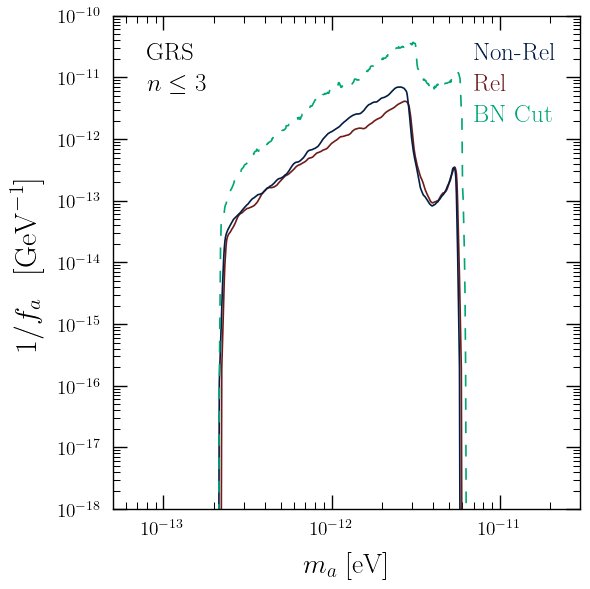

In [122]:
## Compare N3 non-rel, N3 rel, Doddy N3 NonRel

### Do Cyg X1!
fig, ax = plt.subplots(1, figsize=(6,6))

cList = ["#6F1D1B", "#031D44", "#00A676", "#B68F40", "#B68F40", "#6DAEDB"]

lww=1.2
ax.plot(MeGRS[:,0], MeGRS[:,1], cList[0], lw=lww)
ax.plot(grsN3_NR[:,0], grsN3_NR[:,1], cList[1], lw=lww)

ax.plot(grs_doddy[:,0], grs_doddy[:,1], cList[2], lw=lww, ls= (0, (7, 7)))
# ax.plot(grs_doddy2[:,0], grs_doddy2[:,1], 'r', lw=lww, ls= (0, (7, 7)))

#ax.fill_between(bbn, outtot, 0, color="k",ec="k", alpha=0.1)

ax.set_yscale("log")
ax.set_xscale("log")


ax.set_ylim([1e-18, 1e-10])
ax.set_xlim([5e-14, 3e-11])
ax.set_xlabel(r"$m_a$   [eV]", fontsize=20)
ax.set_ylabel(r"$1 / f_a$  \, [${\rm GeV}^{-1}$]", fontsize=22)

ax.text(8e-14, 10**-10.7, "GRS", fontsize=18, c="k");
ax.text(8e-14, 10**-11.2, r"$n \leq 3$", fontsize=18, c="k");

ax.text(7e-12, 10**-10.7, "Non-Rel", fontsize=18, c=cList[1]);
ax.text(7e-12, 10**-11.2, "Rel", fontsize=18, c=cList[0]);
ax.text(7e-12, 10**-11.7, "BN Cut", fontsize=18, c=cList[2]);

# ax.text(6e-12, 10**-10.8, r"$n \leq 3$", fontsize=20, c="k");
plt.tight_layout()
plt.savefig("GRS_N3_Rel.jpeg", dpi=200)

In [50]:
cygN3_NR = np.loadtxt("../stored_limits/Me_CygX1_NonRel_N3.dat")
cyg_doddy = np.loadtxt("../stored_limits/Doddy_Cyg_Rel_N3_2.dat")

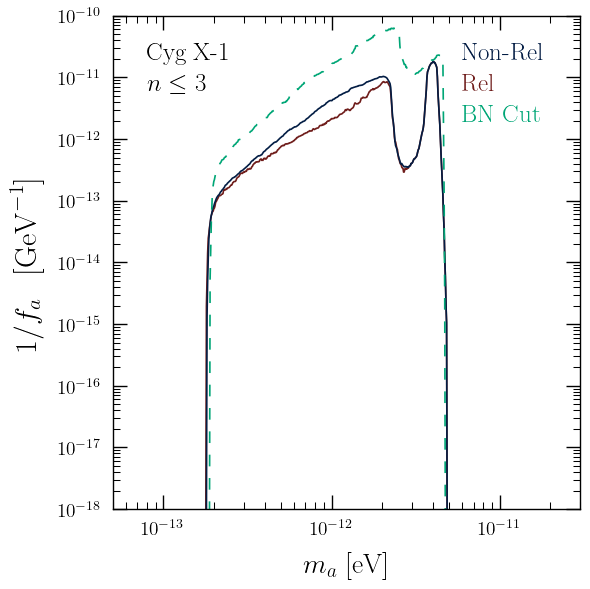

In [51]:
## Compare N3 non-rel, N3 rel, Doddy N3 NonRel

### Do Cyg X1!
fig, ax = plt.subplots(1, figsize=(6,6))

cList = ["#6F1D1B", "#031D44", "#00A676", "#B68F40", "#B68F40", "#6DAEDB"]

lww=1.2
ax.plot(MeCYG[:,0], MeCYG[:,1], cList[0], lw=lww)
ax.plot(cygN3_NR[:,0], cygN3_NR[:,1], cList[1], lw=lww)

ax.plot(cyg_doddy[:,0], cyg_doddy[:,1], cList[2], lw=lww, ls= (0, (7, 7)))

#ax.fill_between(bbn, outtot, 0, color="k",ec="k", alpha=0.1)

ax.set_yscale("log")
ax.set_xscale("log")


ax.set_ylim([1e-18, 1e-10])
ax.set_xlim([5e-14, 3e-11])
ax.set_xlabel(r"$m_a$   [eV]", fontsize=20)
ax.set_ylabel(r"$1 / f_a$  \, [${\rm GeV}^{-1}$]", fontsize=22)

ax.text(8e-14, 10**-10.7, "Cyg X-1", fontsize=18, c="k");
ax.text(8e-14, 10**-11.2, r"$n \leq 3$", fontsize=18, c="k");

ax.text(6e-12, 10**-10.7, "Non-Rel", fontsize=18, c=cList[1]);
ax.text(6e-12, 10**-11.2, "Rel", fontsize=18, c=cList[0]);
ax.text(6e-12, 10**-11.7, "BN Cut", fontsize=18, c=cList[2]);



# ax.text(6e-12, 10**-10.8, r"$n \leq 3$", fontsize=20, c="k");
plt.tight_layout()
plt.savefig("Cyg_N3_Rel.jpeg", dpi=200)

In [ ]:
# check1 = savgol_filter(CygN4Consnew[:,1], 5, 3) # window size 51, polynomial order 3
# check1[0] = 1e-19
# check1[-1] = 1e-19
# check1[check1 <= 0] = 1e-19
# #check2 = 10**savgol_filter(np.log10(CygN4new[:,1]), 9, 3) # window size 51, polynomial order 3
# check2 = savgol_filter((CygN4new[:,1]), 5, 3) # window size 51, polynomial order 3
# check2[0] = 1e-19
# check2[-1] = 1e-19
# check2[check2 <= 0] = 1e-19

In [ ]:
# test = np.loadtxt("../stored_limits/TEST_Cyg_FID.dat")
test = np.loadtxt("../stored_limits/Me_CygX1_Rel_N5.dat")
# test = np.loadtxt("../stored_limits/TEST_GRS.dat")

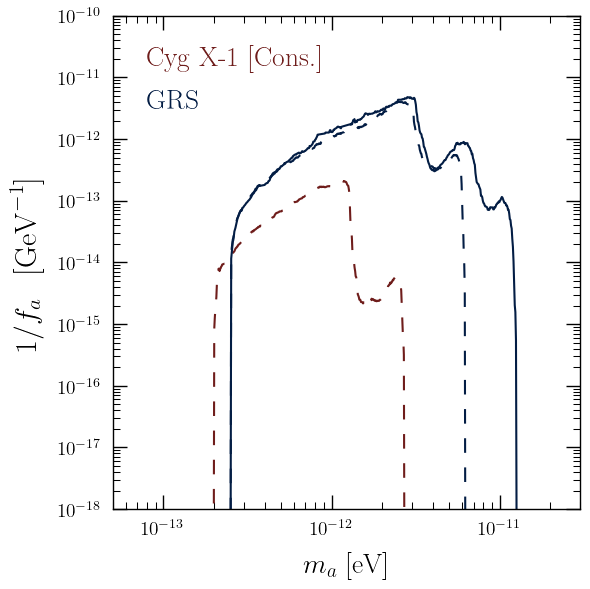

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,6))

lww=1.5

cygCn3 = np.loadtxt("../stored_limits/Me_CygX1_Con_Rel_N3.dat")
grsn5 = np.loadtxt("../stored_limits/Me_GRS_Rel_N5.dat")
ax.plot(cygCn3[:,0], cygCn3[:,1], cList[0], lw=lww, ls= (0, (7, 7)))
ax.plot(MeGRS[:,0], MeGRS[:,1], cList[1], lw=lww, ls= (0, (7, 7)))

ax.plot(grsn5[:,0], grsn5[:,1], cList[1], lw=lww)

# ax.fill_between(bbn, outtot, 0, color="k",ec="k", alpha=0.1)

ax.set_yscale("log")
ax.set_xscale("log")


#plt.plot(DLim[:,0], DLim[:,1])
ax.set_ylim([1e-18, 1e-10])
ax.set_xlim([5e-14, 3e-11])
ax.set_xlabel(r"$m_a$   [eV]", fontsize=20)
ax.set_ylabel(r"$1 / f_a$  \, [${\rm GeV}^{-1}$]", fontsize=22)
ax.text(8e-14, 10**-10.8, r"Cyg X-1 [Cons.]", fontsize=20, c=cList[0]);
ax.text(8e-14, 10**-11.5, r"GRS", fontsize=20, c=cList[1]);




plt.tight_layout()
#plt.savefig("CygGRS_n3n5.jpeg", dpi=200)

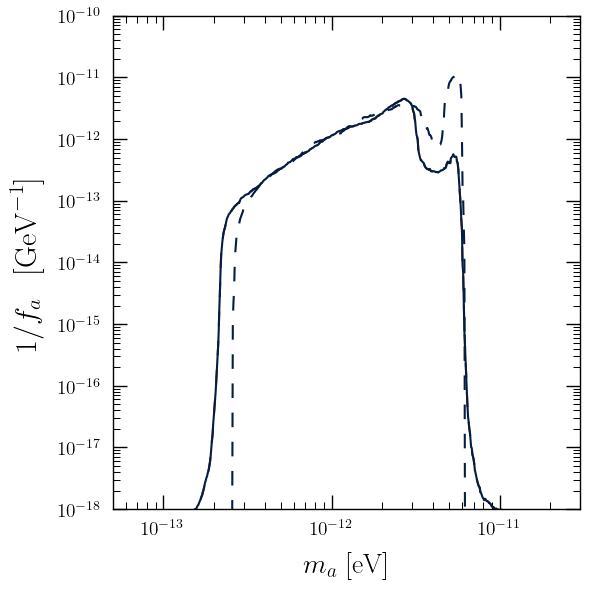

In [9]:
fig, ax = plt.subplots(1, figsize=(6,6))

lww=1.5

t2 = np.loadtxt("../stored_limits/Jan1_2025/Me_GRS_Rel_N3.dat")
t1 = np.loadtxt("../stored_limits/Me_GRS_Rel_N3.dat")
ax.plot(t1[:,0], t1[:,1], cList[0], lw=lww, ls= (0, (7, 7)))
ax.plot(t2[:,0], t2[:,1], cList[1], lw=lww, ls= (0, (7, 7)))

ax.plot(grsn5[:,0], grsn5[:,1], cList[1], lw=lww)

# ax.fill_between(bbn, outtot, 0, color="k",ec="k", alpha=0.1)

ax.set_yscale("log")
ax.set_xscale("log")


#plt.plot(DLim[:,0], DLim[:,1])
ax.set_ylim([1e-18, 1e-10])
ax.set_xlim([5e-14, 3e-11])
ax.set_xlabel(r"$m_a$   [eV]", fontsize=20)
ax.set_ylabel(r"$1 / f_a$  \, [${\rm GeV}^{-1}$]", fontsize=22)





plt.tight_layout()

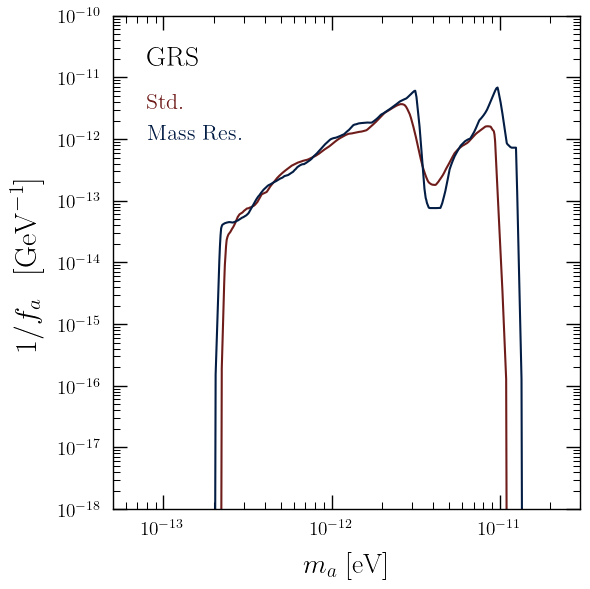

In [123]:
fig, ax = plt.subplots(1, figsize=(6,6))

lww=1.5


grsn5 = np.loadtxt("../stored_limits/Me_GRS_Rel_N5.dat")
grsMM = np.loadtxt("../stored_limits/Me_GRS_MM_Rel_N5.dat")
ax.plot(grsn5[:,0], grsn5[:,1], cList[0], lw=lww)
ax.plot(grsMM[:,0], grsMM[:,1], cList[1], lw=lww)

# ax.fill_between(bbn, outtot, 0, color="k",ec="k", alpha=0.1)

ax.set_yscale("log")
ax.set_xscale("log")


#plt.plot(DLim[:,0], DLim[:,1])
ax.set_ylim([1e-18, 1e-10])
ax.set_xlim([5e-14, 3e-11])
ax.set_xlabel(r"$m_a$   [eV]", fontsize=20)
ax.set_ylabel(r"$1 / f_a$  \, [${\rm GeV}^{-1}$]", fontsize=22)

ax.text(8e-14, 10**-10.8, r"GRS", fontsize=20, c="k");
ax.text(8e-14, 10**-11.5, r"Std.", fontsize=16, c=cList[0]);
ax.text(8e-14, 10**-12, r"Mass Res.", fontsize=16, c=cList[1]);




plt.tight_layout()
plt.savefig("GRS_MassRes.jpeg", dpi=200)

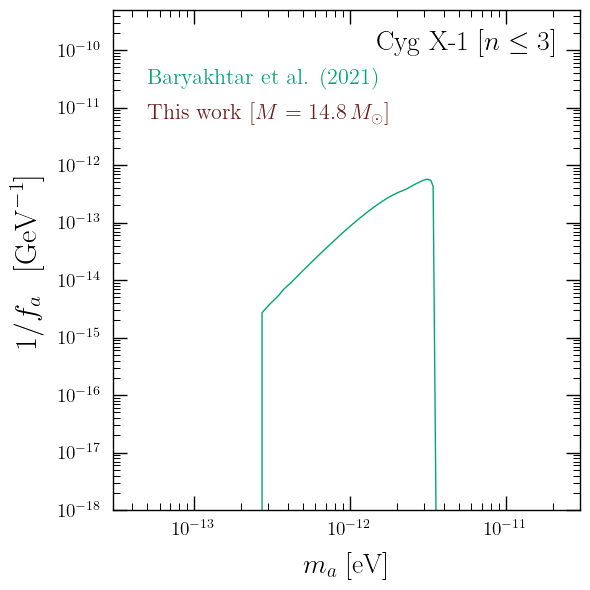

In [288]:
fig, ax = plt.subplots(1, figsize=(6,6))



cygo=np.loadtxt("../stored_limits/Me_CygX1_Old_Rel_N3.dat")

lww=1.3

ax.plot(MLim[:,0], MLim[:,1], cList[2], lw=1)
#ax.plot(MashaB[:,0], MashaB[:,1], "k", lw=lww, ls="dotted")
# ax.plot(DLim[:,0], DLim[:,1], "#C1666B", lw=1)
#ax.plot(doddy2[:,0], doddy2[:,1], "k", lw=lww, ls=(5, (10, 3)))


ax.plot(cygo[:,0], cygo[:,1], cList[0], lw=lww)


massL = np.logspace(-13,11,300)
alL = 7484169213.9427 * 14.8 * massL
fList = np.logspace(19, 8, 300)
aV = 0.998
tauBH = 5e6

#outLimG = np.zeros_like(massL)
#for i in range(len(massL)):
#    tauSD = 1e7 * (0.01 / alL[i])**5 * (1e-12 / massL[i]) * (0.9 / aV)**1.5 * (1e15 / fList)**2
#    delA = tauBH / tauSD

#    if (delA[0] < 0.01)or(alL[i] > 0.42):
#        outLimG[i] = 1e19
#    else:
#        minV = np.argmin(np.abs(delA - 0.001))
#        print(tauSD[minV] / tauBH)
#        outLimG[i] = fList[minV]
#        
#plt.plot(massL, 1/outLimG)

# ax.plot(MeCYG[:,0], MeCYG[:,1], cList[0], lw=lww)
#ax.plot(cygN5[:,0], cygN5[:,1], cList[2], lw=lww)



ax.set_yscale("log")
ax.set_xscale("log")


#plt.plot(DLim[:,0], DLim[:,1])
ax.set_ylim([1e-18, 5e-10])
ax.set_xlim([3e-14, 3e-11])
ax.set_xlabel(r"$m_a$   [eV]", fontsize=20)
ax.set_ylabel(r"$1 / f_a$  \, [${\rm GeV}^{-1}$]", fontsize=22)


# ax.text(5e-14, 10**-10., "Mehta et al. (2021)", fontsize=14, c="#C1666B");
ax.text(5e-14, 10**-10.6, "Baryakhtar et al. (2021)", fontsize=16, c=cList[2]);
ax.text(5e-14, 10**-11.2, "This work [$M = 14.8 \, M_\odot$]", fontsize=16, c=cList[0]);

ax.text(1.5e-12, 10**-10, r"Cyg X-1 [$n \leq 3$]", fontsize=20, c="k");
#ax.text(5e-14, 10**-11, "Fid. [Solid]", fontsize=14, c="k");
#ax.text(5e-14, 10**-11.5, "No Mix [Dashed]", fontsize=14, c="k");
# ax.text(5e-14, 10**-12.0, r"$\tilde{a}_{\rm Thresh}$ [Dot]", fontsize=14, c="k");


# ax.text(3e-12, 10**10.8, "Two-Level", fontsize=20, c="k");
plt.tight_layout()
plt.savefig("CompareLim.jpeg", dpi=200)

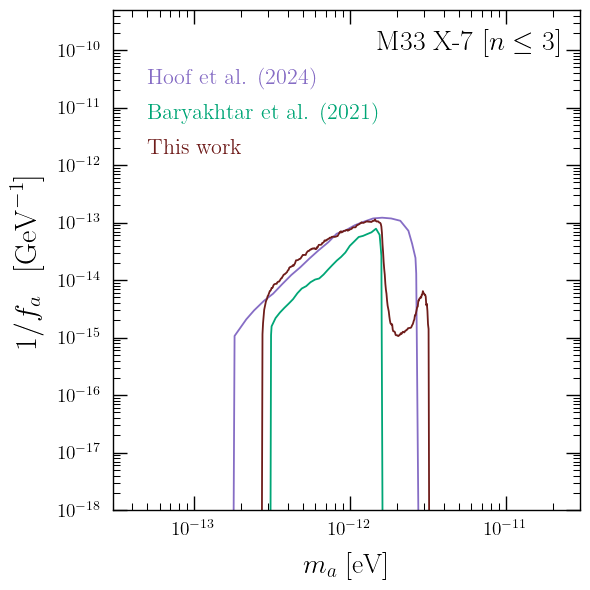

In [54]:
fig, ax = plt.subplots(1, figsize=(6,6))


cList = ["#6F1D1B", "#031D44", "#00A676", "#B68F40", "#B68F40", "#6DAEDB"]

lww=1.3

loadH = np.loadtxt("../stored_limits/raw_hoof_lim.dat")
plt.plot(loadH[:,0], loadH[:,1], "#866DC5", lw=lww)
loadM = np.loadtxt("../stored_limits/raw_masha_m33.dat")
plt.plot(loadM[:,0], loadM[:,1], cList[2], lw=lww)
ax.plot(MeM33[:,0], MeM33[:,1], cList[0], lw=lww)

ax.set_yscale("log")
ax.set_xscale("log")


#plt.plot(DLim[:,0], DLim[:,1])
ax.set_ylim([1e-18, 5e-10])
ax.set_xlim([3e-14, 3e-11])
ax.set_xlabel(r"$m_a$   [eV]", fontsize=20)
ax.set_ylabel(r"$1 / f_a$  \, [${\rm GeV}^{-1}$]", fontsize=22)


ax.text(5e-14, 10**-10.6, "Hoof et al. (2024)", fontsize=16, c="#866DC5");
ax.text(5e-14, 10**-11.2, "Baryakhtar et al. (2021)", fontsize=16, c=cList[2]);
ax.text(5e-14, 10**-11.8, "This work", fontsize=16, c=cList[0]);

ax.text(1.5e-12, 10**-10, r"M33 X-7 [$n \leq 3$]", fontsize=20, c="k");
# ax.text(5e-14, 10**-11, "Fid. [Solid]", fontsize=14, c="k");
# ax.text(5e-14, 10**-11.5, "No Mix [Dashed]", fontsize=14, c="k");
# ax.text(5e-14, 10**-12.0, r"$\tilde{a}_{\rm Thresh}$ [Dot]", fontsize=14, c="k");


# ax.text(3e-12, 10**10.8, "Two-Level", fontsize=20, c="k");
plt.tight_layout()
plt.savefig("CompareLim_2.jpeg", dpi=200)

## Difference low mass: ? attribute to the fact that they don't run -- effectively the limit setting condition is not really correct...
## Difference high mass: ? 

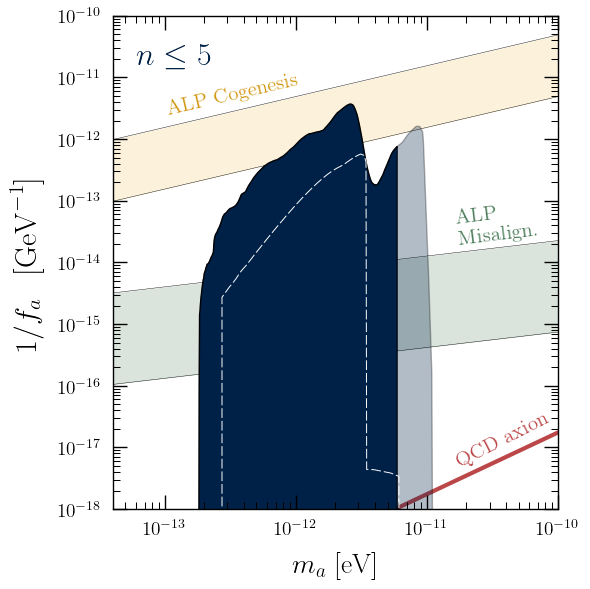

In [121]:
fig, ax = plt.subplots(1, figsize=(6,6))

lww=1.5
cc="#002147"
#ax.plot(MeCYGN4CONS[:,0], MeCYGN4CONS[:,1], cc, lw=lww)


cygCn3 = np.loadtxt("../stored_limits/Me_CygX1_Con_Rel_N3.dat")
cygC3 = interp1d(np.log10(cygCn3[:,0]), np.log10(cygCn3[:,1]),  fill_value=-20, bounds_error=False)

GRSN5_full = np.loadtxt("../stored_limits/Me_GRS_Rel_N5.dat")
grs5 = interp1d(np.log10(GRSN5_full[:,0]), np.log10(GRSN5_full[:,1]),  fill_value=-20, bounds_error=False)

maxMass = np.max(MeGRS[MeGRS[:,1] > 1e-17,0])
mm = np.logspace(-14,np.log10(maxMass),1000)
# mm = np.logspace(-14,np.log10(6.5e-12),1000)
outp = np.zeros_like(mm)

for i in range(len(mm)):
    outp[i] = np.max([10**grs5(np.log10(mm[i])), 10**cygC3(np.log10(mm[i]))])
    
mm_2 = np.logspace(np.log10(mm[0]), np.log10(2e-11),1000)
outp_2 = np.zeros_like(mm)

for i in range(len(mm)):
    outp_2[i] = np.max([10**grs5(np.log10(mm_2[i])), 10**cygC3(np.log10(mm_2[i]))])

ax.fill_between(mm, outp, 0, color=cc,ec="k", alpha=1, zorder=1)
np.savetxt("/Users/samuelwitte/Desktop/SR_Combined_m2.dat", np.column_stack((mm, outp)))
ax.fill_between(mm_2, outp_2, 0, color=cc,ec="k", alpha=.3, zorder=1)
# ax.fill_between(bbn, outtot, 0, color="k",ec="k", alpha=0.1)

ax.set_yscale("log")
ax.set_xscale("log")


EMD_lower = 1.448226539542627e-19*2*np.pi*137
EMD_upper = 2.6761051177154226e-18*2*np.pi*137
#ax.fill_between([1e-14, 1e-10],[EMD_upper,EMD_upper],[EMD_lower,EMD_lower],color='#8596c7',alpha=1,zorder=-100,edgecolor='k',lw=.8)

alPA=0.2

# Post-inflation ALP
def ALP_n0(m,theta_i=2.33,gstar_T1=90):
    fa_inv = np.sqrt(2*theta_i**2)/1.9e13*(m/1e-6)**(1/4)*(90/gstar_T1)**(1/8)
    return fa_inv

m = np.logspace(-14, -10, 1000)
eps = 0.1
ax.fill_between(m, ALP_n0(m,theta_i=0.1),ALP_n0(m,theta_i=np.pi-0.1),color='#4A7C59',alpha=alPA,lw=0,zorder=-10)
ax.plot(m,ALP_n0(m,theta_i=0.1),'k',lw=.3,zorder=-10)
ax.plot(m,ALP_n0(m,theta_i=np.pi-0.1),'k',lw=.3,zorder=-10)


def ALP_Cogenesis(m,C_agamma=1,T_EW=130,cb=0.1):
    g = C_agamma*1.8e-11*(0.1/cb)**0.5*(m/1e-3)**0.5*(130/T_EW)
    return g
ax.fill_between(m,ALP_Cogenesis(m,1)*(137*2*np.pi),ALP_Cogenesis(m,10.0)*(137*2*np.pi),color='#F2C14E',alpha=alPA,lw=0,zorder=-1)
ax.plot(m,ALP_Cogenesis(m,1)*(137*2*np.pi),color='k',alpha=1,lw=.3,zorder=-1)
ax.plot(m,ALP_Cogenesis(m,10.0)*(137*2*np.pi),color='k',alpha=1,lw=.3,zorder=-1)

shft=1.12
plt.plot(m,1/(1e12*(5.7e-6/m)),lw=3,color='#BC4749',zorder=-10,solid_capstyle='round', alpha=1)
#plt.plot(m,1/(1e12*(5.7e-6/m)) * shft,lw=0.3,color='k',alpha=1)
#plt.plot(m,1/(1e12*(5.7e-6/m)) / shft,lw=0.3,color='k',zorder=-10,solid_capstyle='round', alpha=1)


ax.text(1e-13, 10**-11.6, r"ALP Cogenesis", fontsize=15, c="#D19710", rotation=13);
ax.text(1.6e-11, 10**-13.7, "ALP \n Misalign.", fontsize=15, c="#4A7C59", rotation=7);
ax.text(1.6e-11, 10**-17.3, r"QCD axion", fontsize=15, c="#BC4749", rotation=27);
#ax.text(5.5e-14, 10**-12.8, r"Superradiance", fontsize=25, c=cc, rotation=0);
ax.text(6e-14, 10**-10.8, r"$n \leq 5$", fontsize=23, c=cc, rotation=0);

MashaB = np.loadtxt("../stored_limits/BlackHoleSpins_Baryakhtar.txt")
ax.plot(MashaB[:,0], MashaB[:,1], "w", lw=.7, ls=(5, (10, 3)))
# ax.plot(doddy2[:,0], doddy2[:,1], "k", lw=lww, ls=(5, (10, 3)))

#plt.plot(DLim[:,0], DLim[:,1])
ax.set_ylim([1e-18, 1e-10])
ax.set_xlim([4e-14, 1e-10])
ax.set_xlabel(r"$m_a$   [eV]", fontsize=20)
ax.set_ylabel(r"$1 / f_a$  \, [${\rm GeV}^{-1}$]", fontsize=22)
# ax.text(8e-14, 10**-10.8, "Cyg X-1", fontsize=20, c="k");


plt.tight_layout()
plt.savefig("mainlim.jpeg", dpi=200)

In [111]:
MeGRS

array([[1.30000000e-13, 1.00000000e-19],
       [1.31097552e-13, 1.00000000e-19],
       [1.32204370e-13, 1.00000000e-19],
       ...,
       [1.96665208e-11, 1.00000000e-19],
       [1.98325595e-11, 1.00000000e-19],
       [2.00000000e-11, 1.00000000e-19]])